<h1>Experiment IV: Matching on 3x3 patches and rudimentary parameter tuning</h1><br>
...explanation should go here...

In [2]:
import numpy as np
from components.classes import ParallelMatcherNW3 as m
from components.non_oo_entities import utils as u
import imp
import cv2
import os
import matplotlib.pyplot as plt
import gc
from components.classes.ExperimentLogger import ExperimentLogger as l
from components.classes.Metrix import Metrix as me
import time


C:\gdrive\python_projects


Please select resolution: 0 for small, 1 for medium and 2 for the original image size:


 0


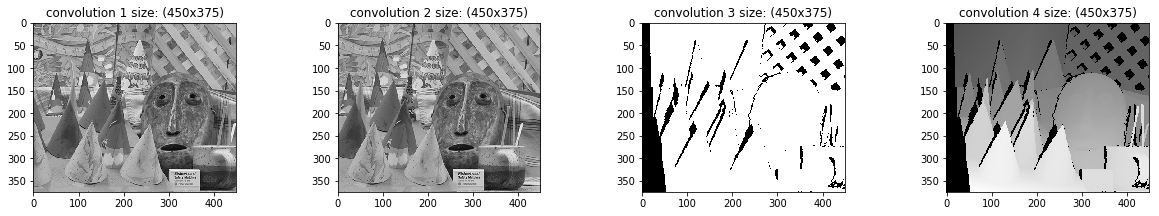

In [3]:
log = l()
resolutions = list(["", "H", "F"])
print("Please select resolution: 0 for small, 1 for medium and 2 for the original image size:")
selectedResolutionIndex = int(input())
im2 = cv2.imread("./datasets/middlebury_2003/cones"+resolutions[selectedResolutionIndex]+"/im2.ppm", cv2.IMREAD_GRAYSCALE).astype(np.float64)
im6 = cv2.imread("./datasets/middlebury_2003/cones"+resolutions[selectedResolutionIndex]+"/im6.ppm", cv2.IMREAD_GRAYSCALE).astype(np.float64)

occlusion_path = "metrix_test/gt/cones_nonocc.png"
occlusion_map = cv2.imread(occlusion_path, cv2.IMREAD_GRAYSCALE).astype(np.float64)

gt_path = "./metrix_test/gt/cones_groundtruth.png"
groundtruth = cv2.imread(gt_path, cv2.IMREAD_GRAYSCALE)
groundtruth_occluded = u.add_occlusions(groundtruth, occlusion_map)/4
u.plotNImages2([im2, im6, occlusion_map,groundtruth_occluded] , cols = 4)    



In [4]:
spec_dict = dict({})
spec_dict["output_folder"] = "test_outputs"

spec_dict["is_parallel"] = "True"
spec_dict["img_name"] = "cones"
spec_dict["alg_type"] =  "patch_match"
spec_dict["is_img_preprocessed"] = "False"
spec_dict["convolution_filters"] = "-"
spec_dict["filter_strategy"] = "-"
spec_dict["matching_mode"] = non_occ =  "non_occ"
spec_dict["matrix_init_mode"] = 0
match = spec_dict["match"] = 0
gap = spec_dict["gap"] = 0
egap = spec_dict["egap"] = 0
print("Please define the output image's extension")
spec_dict["ext"] = input()

Please define the output image's extension


 png


In [5]:
#loop_params
tuning = []

tuning.append([40,-10,1])
tuning.append([60,-20, -1])
tuning.append([80,-40, -1])
tuning.append([60*3,-20*3, -1*3])
tuning.append([80*3,-40*3, -1*3])
tuning.append([60*6,-20*6, -1*6])
tuning.append([80*6,-40*6, -1*6])
tuning.append([60*9,-20*9, -1*9])
tuning.append([80*9,-40*9, -1*9])
scoring_options = [0,1,2]
imp.reload(m)

<module 'components.classes.ParallelMatcherNW3' from '/home/contact_gergo_endresz/FYP/components/classes/ParallelMatcherNW3.py'>

Matcher has been initialized.
i equals 5
Aligning scanlines has finished. It has taken: 122.67 seconds.
CPU times: user 4.71 s, sys: 2.89 s, total: 7.6 s
Wall time: 2min 2s
MATCH_END: img_name: cones; is_img_preprocessed: False; alg_type: patch_match; is_parallel: True;  match: 40; gap: -10; egap: 1; matrix_init_mode: 0 convolution_filters: -; filter_strategy: -, matching_mode: non_occ;  runtime: 122.77078056335449;  output_file_path: test_outputs/cones_is_img_p=False&alg_t=patch_match&is_p=True&m=40&g=-10&eg=1&mim=0&cfil=-&fs=-&mm=non_occ&rt=122_77078056335449&b1=0_60&b1_5=0_59&b2=0_57&b10=0_51&avg_e=16_66.png Metrix@ 1: ['bad1'], b1.5: 0.5851131831635702, b2:0.5731000653113405, b10:0.5120131178522296 ABS_ERR: 16.658720453566417
Matcher has been initialized.
i equals 5
Aligning scanlines has finished. It has taken: 121.88 seconds.
CPU times: user 4.57 s, sys: 3.24 s, total: 7.81 s
Wall time: 2min 2s
MATCH_END: img_name: cones; is_img_preprocessed: False; alg_type: patch_match; is_para

/home/contact_gergo_endresz/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


i equals 5
Aligning scanlines has finished. It has taken: 121.06 seconds.
CPU times: user 4.19 s, sys: 4.15 s, total: 8.34 s
Wall time: 2min 1s
MATCH_END: img_name: cones; is_img_preprocessed: False; alg_type: patch_match; is_parallel: True;  match: 180; gap: -60; egap: -3; matrix_init_mode: 2 convolution_filters: -; filter_strategy: -, matching_mode: non_occ;  runtime: 121.20903968811035;  output_file_path: test_outputs/cones_is_img_p=False&alg_t=patch_match&is_p=True&m=180&g=-60&eg=-3&mim=2&cfil=-&fs=-&mm=non_occ&rt=121_20903968811035&b1=0_24&b1_5=0_20&b2=0_19&b10=0_16&avg_e=5_03.png Metrix@ 1: ['bad1'], b1.5: 0.2007698400566958, b2:0.1929046871308867, b10:0.16401484095993774 ABS_ERR: 5.030199546989425
Matcher has been initialized.
i equals 5
Aligning scanlines has finished. It has taken: 120.96 seconds.
CPU times: user 4.16 s, sys: 4.11 s, total: 8.27 s
Wall time: 2min 1s
MATCH_END: img_name: cones; is_img_preprocessed: False; alg_type: patch_match; is_parallel: True;  match: 240; g

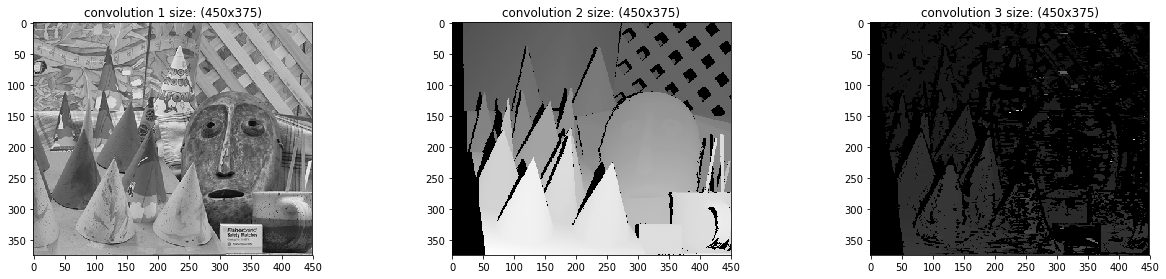

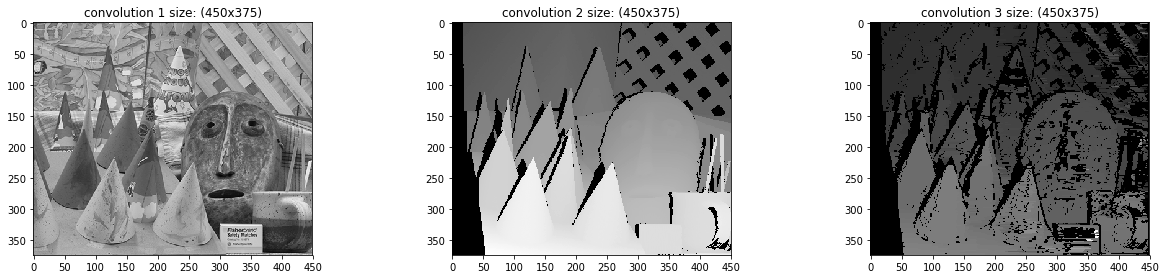

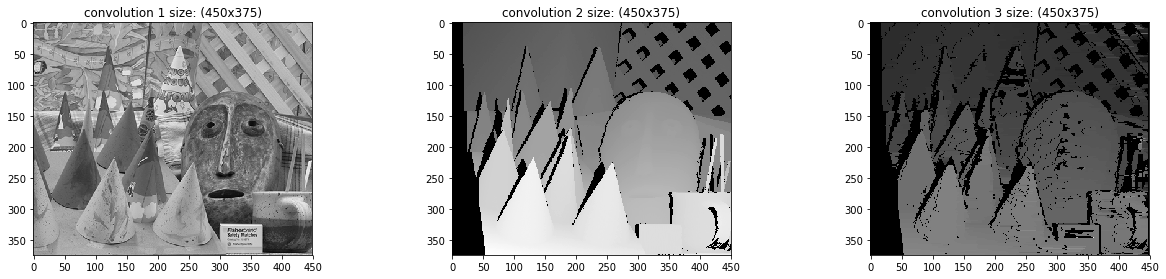

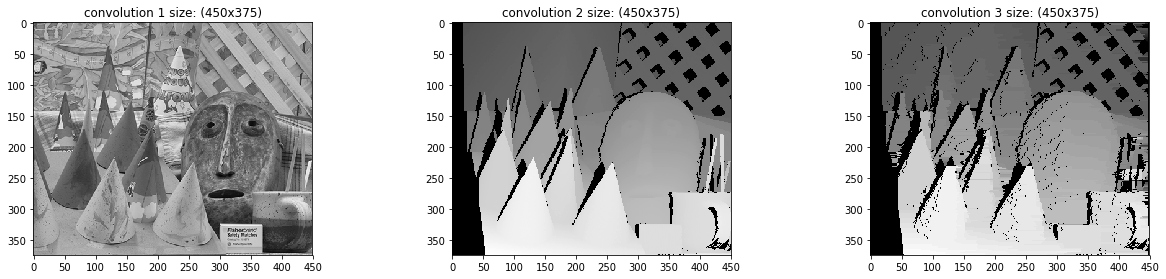

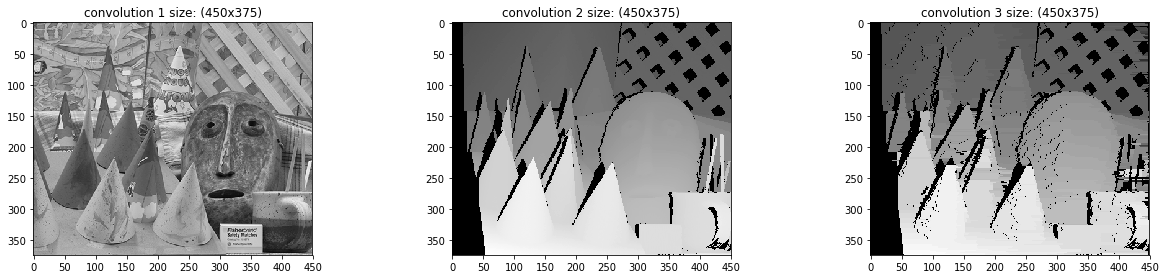

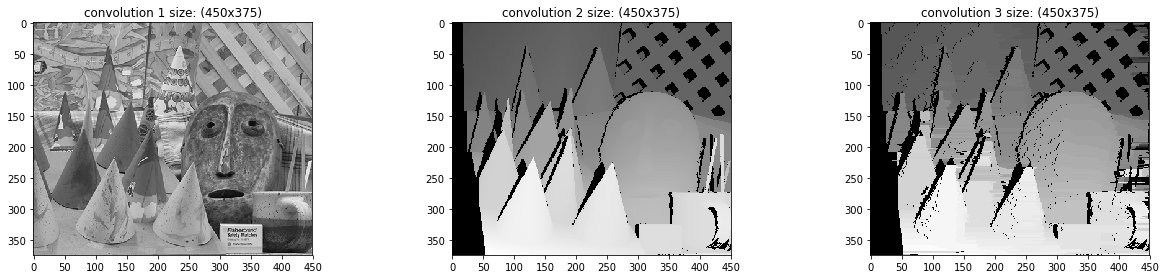

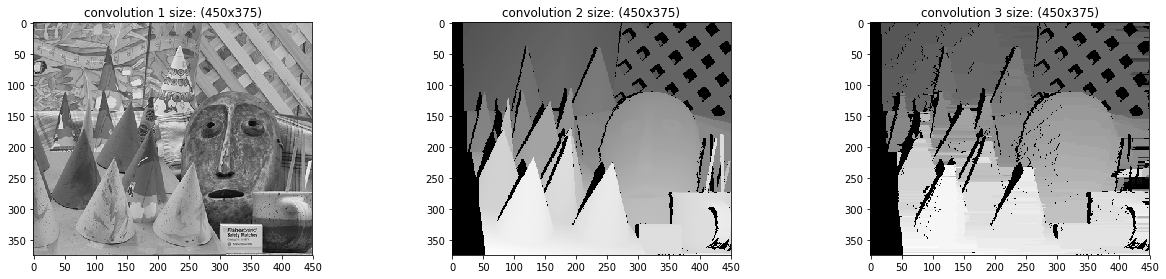

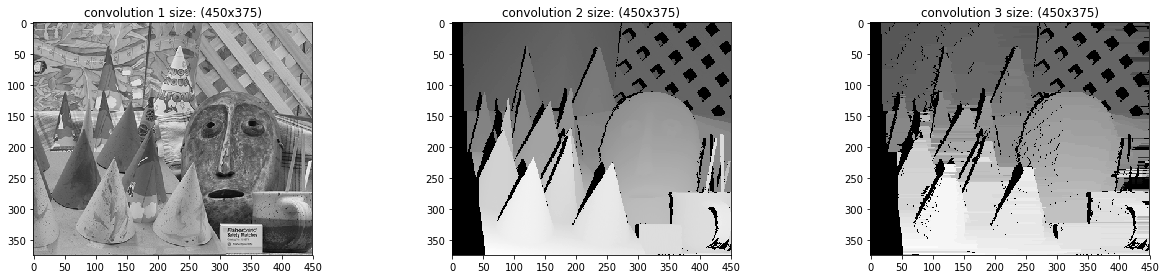

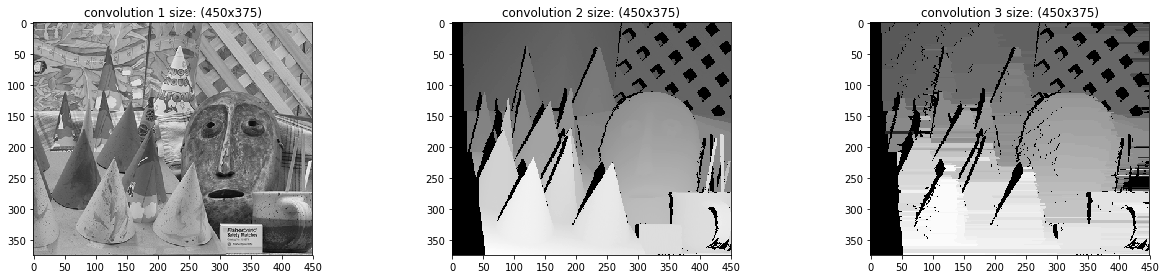

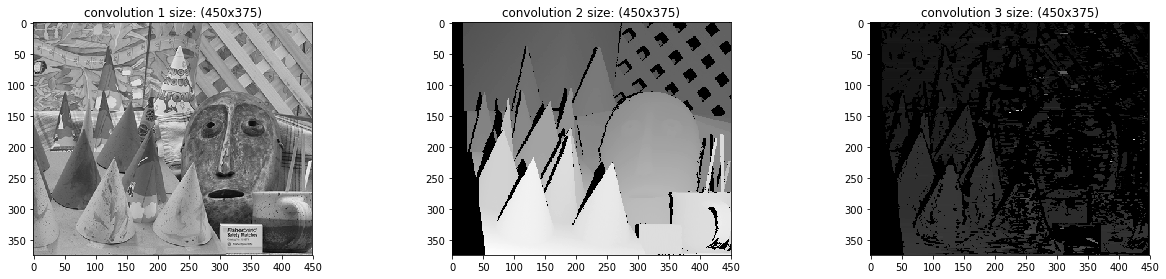

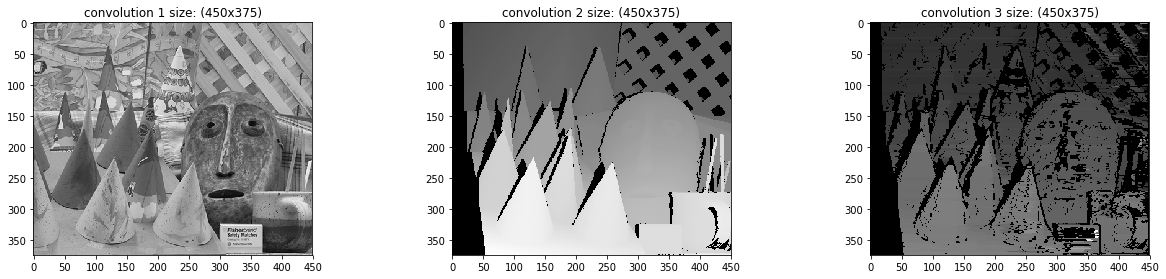

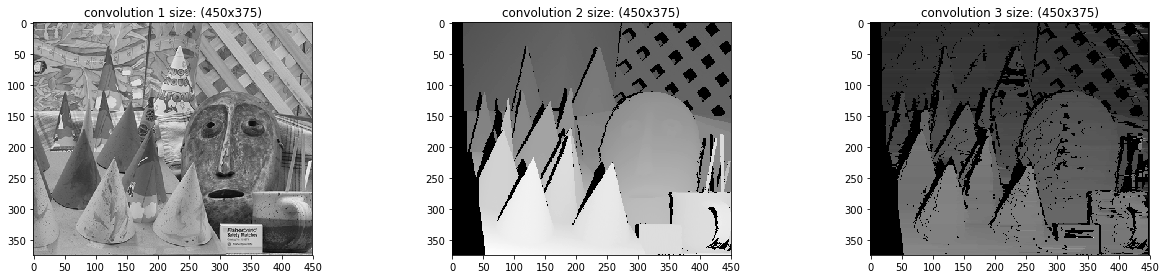

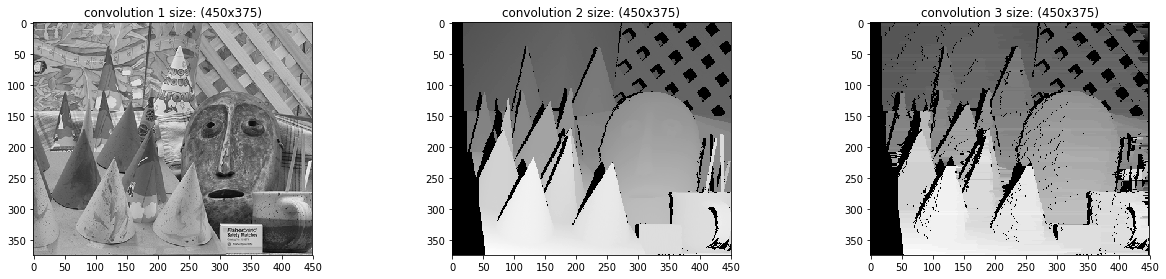

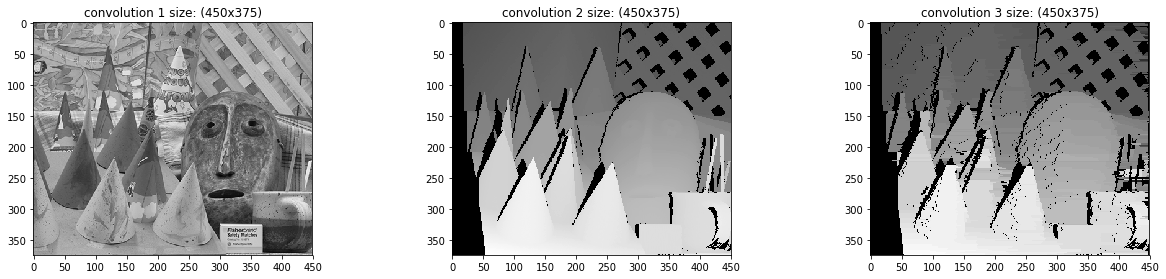

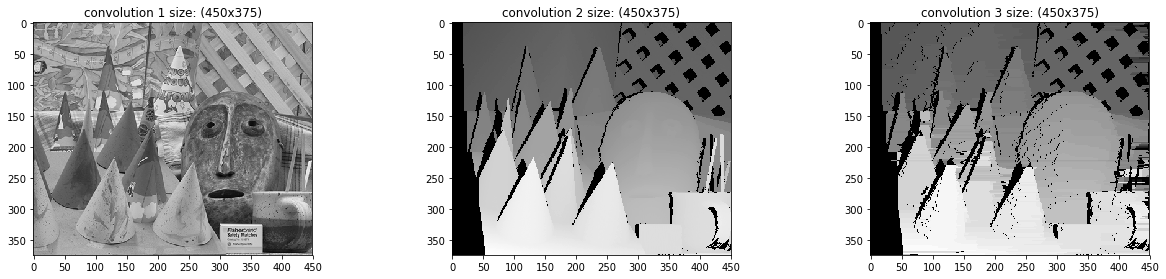

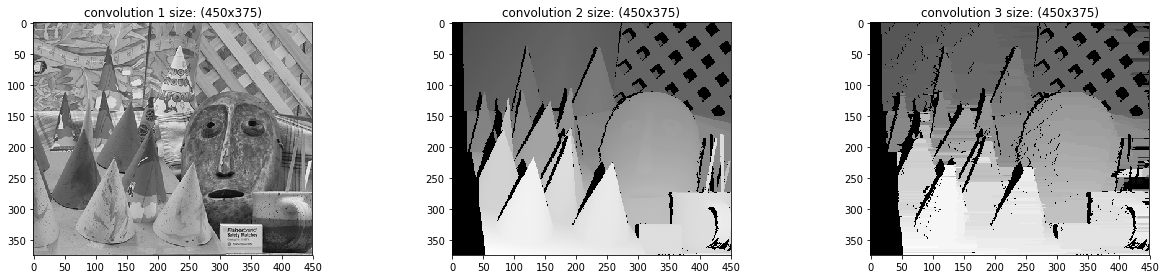

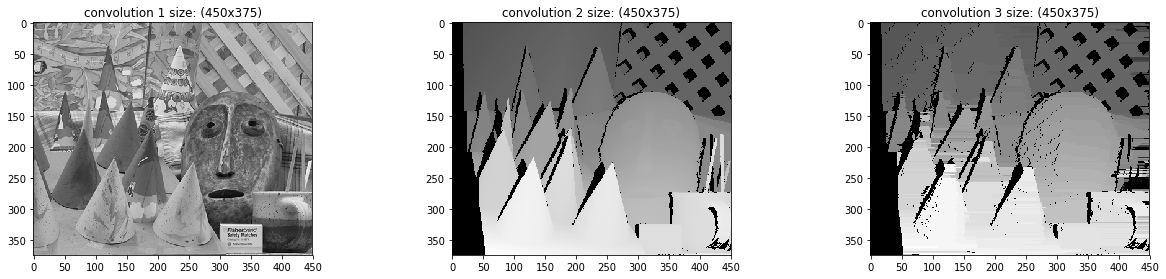

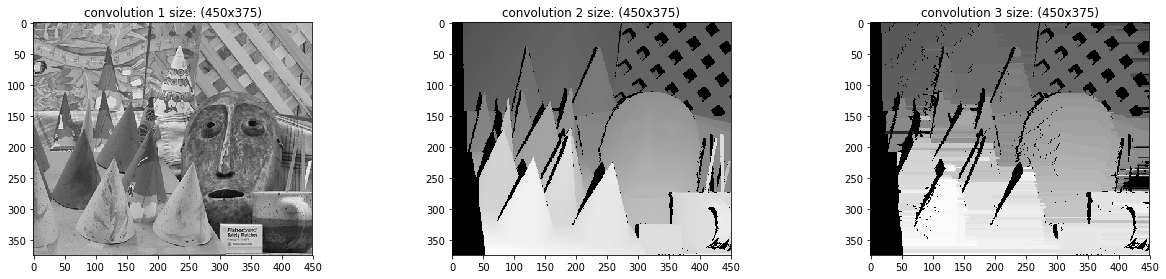

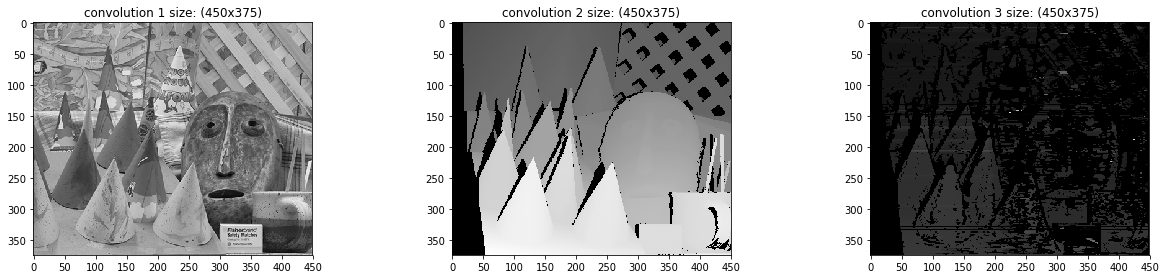

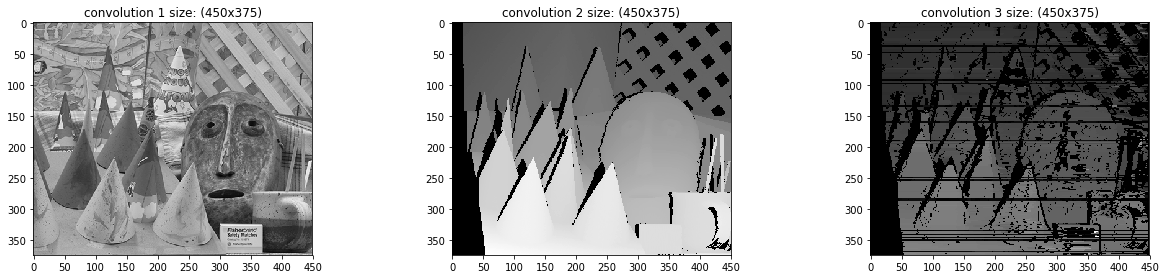

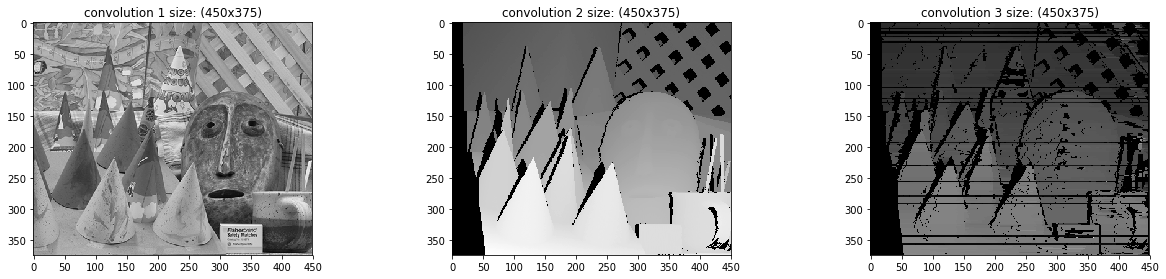

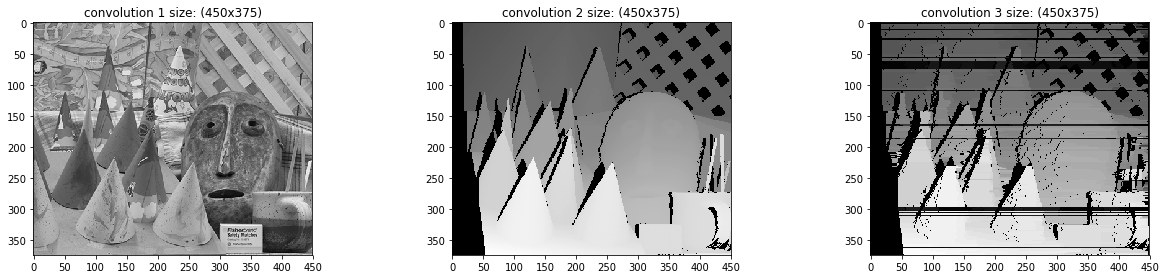

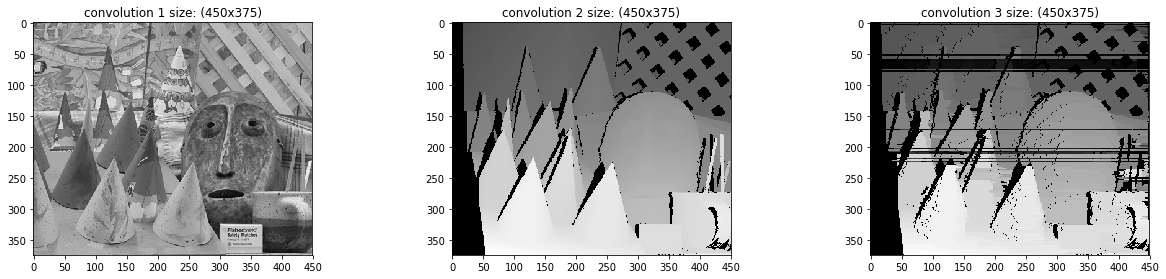

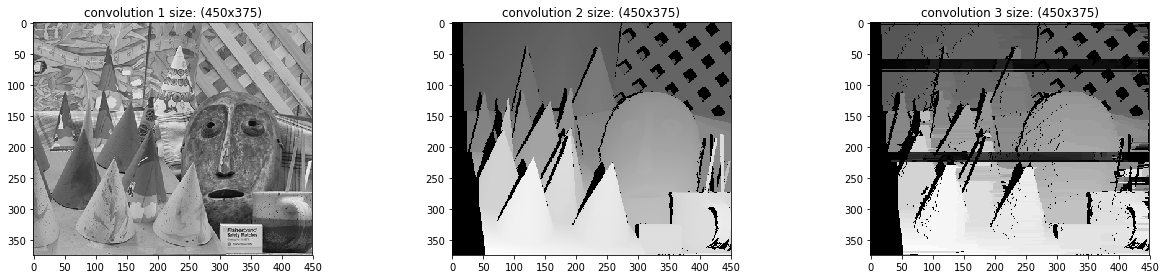

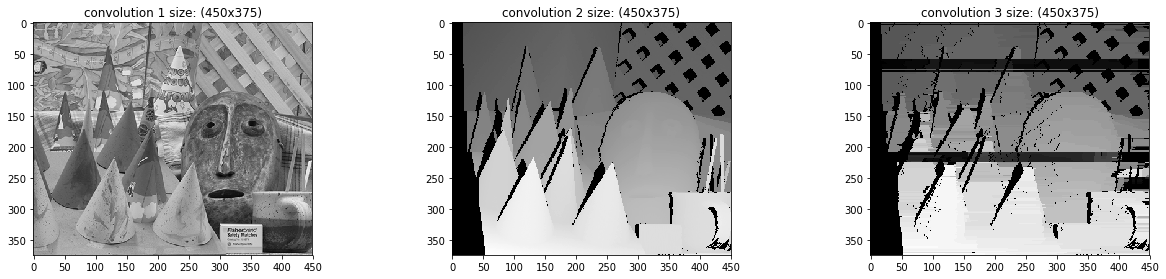

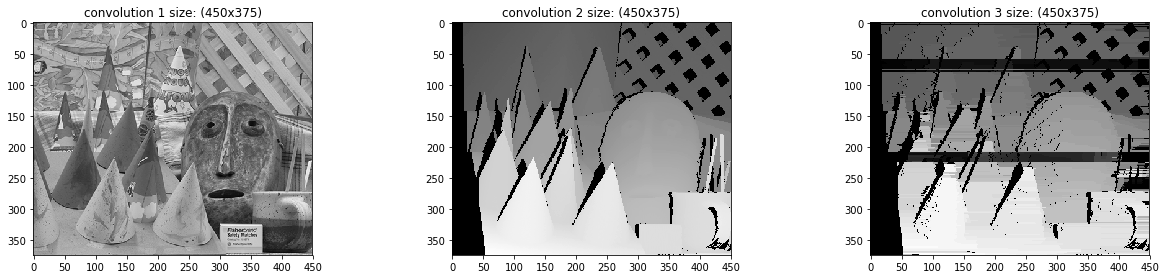

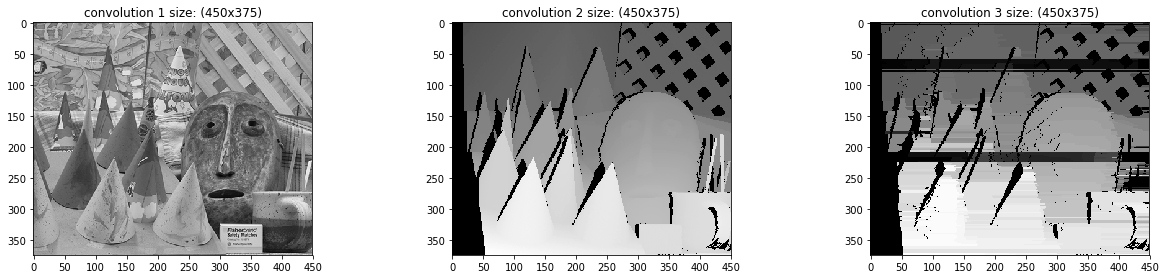

In [6]:
for s in scoring_options:
    for t in tuning:
        spec_dict["matrix_init_mode"] = s
        match = spec_dict["match"] = t[0]
        gap = spec_dict["gap"] = t[1]
        egap = spec_dict["egap"] = t[2]
        
        log.log_matching_started(spec_dict)
        
        matcher = m.getOne(match, gap, egap, initIndex=s)
        matcher.initialize(im2, im6)
        
        tic=time.time()
        %time matcher = u.executeParallelMatching(matcher)
        toc = time.time()
        
        raw_disp_map = matcher.lastDisparity
        
        disp_occluded = u.add_occlusions(raw_disp_map, occlusion_map)
        
        u.plotNImages2([im2, groundtruth_occluded, disp_occluded], cols=3)
        
        wanna_print = False
        spec_dict["runtime"] = toc-tic
        spec_dict["bad1"] = me.bad(disp_occluded, groundtruth_occluded, threshold = 1.0, non_occ= non_occ, print=wanna_print, occlusion_map = occlusion_map)
        spec_dict["bad15"] = me.bad(disp_occluded, groundtruth_occluded, threshold = 1.5, non_occ= non_occ, print=wanna_print, occlusion_map = occlusion_map)
        spec_dict["bad2"] = me.bad(disp_occluded, groundtruth_occluded, threshold = 2, non_occ= non_occ, print=wanna_print, occlusion_map = occlusion_map)
        spec_dict["BAD8"] = me.bad(disp_occluded, groundtruth_occluded, threshold = 10.0, non_occ= non_occ, print=wanna_print, occlusion_map = occlusion_map)

        spec_dict["ABS_ERR"] = me.avgerr(disp_occluded, groundtruth_occluded, print=wanna_print, occlusion_map = occlusion_map)

        filename = u.get_output_filename(spec_dict)
        spec_dict["output_file_path"] = os.path.join(spec_dict["output_folder"], filename)
        log.log_matching_ended(spec_dict)
        cv2.imwrite(spec_dict["output_file_path"], disp_occluded)

        gc.collect()
